# **Análise Exploratória de Salários em Carreiras de Dados**

## **Funções e bibliotecas necessárias para o projeto**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Negócio**

#### **Contextualização**

Nos últimos anos, a área de Ciência de Dados cresceu de forma acelerada, se tornando uma das mais promissoras no mercado de tecnologia. Profissionais como Data Analysts e Data Scientists passaram a ser cada vez mais valorizados, mas ainda existe muita dúvida sobre como os salários variam entre cargos, níveis de experiência e localização.

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre salários de profissionais da área de dados, utilizando um dataset público do Kaggle. A análise busca responder perguntas como:

1- Qual a distribuição de salários em dólar para profissionais de dados?

2- Como variam os salários entre Data Analysts e Data Scientists?

3- Qual o impacto do nível de experiência (junior, pleno, sênior, executivo) na remuneração?

4- Há diferenças significativas dependendo da localização da empresa?

#### **Objetivo**

Além de explorar o dataset, este projeto também tem como propósito:

1- Exercitar técnicas de manipulação de dados com Pandas.

2- Criar visualizações claras com Matplotlib e Seaborn.

3- Extrair insights relevantes que podem ser úteis para quem deseja ingressar ou crescer na área de dados.


### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Downlaod realizado em [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download)

#### **Descrição das Colunas**

**work_year**

    Ano em que o salário ou a vaga foi registrado.

    Exemplo: 2023.

    Permite análise de evolução salarial ou tendências do mercado ao longo dos anos.

**job_title**

    Nome do cargo.

    Exemplo: Data Scientist, Data Engineer, Data Architect.

    Mostra a variedade de posições no mercado de dados.

**job_category**

    Agrupamento das funções em categorias mais amplas.

    Exemplo: Data Science and Research, Data Engineering, Data Architecture and Modeling.

    Facilita identificar áreas mais bem pagas ou mais demandadas.

**salary_currency**

    Moeda em que o salário foi reportado.

    Exemplo: USD, EUR, GBP.

**salary**

    Valor do salário na moeda original reportada.

**salary_in_usd**

    Valor convertido para dólares americanos (USD).

    Permite comparações diretas entre países.

**employee_residence**

    País de residência do empregado.

    Exemplo: Germany, United States, Brazil.

    Útil para comparar salários por país de residência.

**experience_level**

    Nível de experiência do profissional.

    Exemplo: Entry-level, Mid-level, Senior, Executive.

    Permite avaliar a progressão salarial conforme experiência.

**employment_type**

    Tipo de contrato.

    Exemplo: Full-time, Part-time, Contract, Freelance.

    Mostra a estrutura de contratação no mercado.

**work_setting**

    Modelo de trabalho.

    Exemplo: Remote, Hybrid, In-person.

    Permite avaliar se o trabalho remoto impacta salários.

**company_location**

    Localização da empresa (país).

    Exemplo: United States, Germany, India.

    Pode diferir do país de residência do empregado.

**company_size**

    Tamanho da empresa:

        S = Pequena (até 50 funcionários)

        M = Média (51 a 250 funcionários)

        L = Grande (mais de 250 funcionários)

    Útil para entender diferenças salariais entre empresas de portes distintos.

OBS.: Dataset robusto, com **9.355 registros** de vagas/salários na área de dados, abrangendo diferentes anos, cargos, países, níveis de experiência e tipos de trabalho.

#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data\jobs_in_data.csv', sep=',')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
print(f"{df.duplicated().sum() / df['work_year'].count():.2%} do Dataframe possui registros duplicados")

42.91% do Dataframe possui registros duplicados


**Diagnóstico de qualidade dos dados**

    Não há valores ausentes ou nulos.

    Existem duplicados (≈43%), mas decidi mantê-los pois é perfeitamente possível termos mesmos valores para indivíduos diferentes neste cenário.

    'salary_in_usd' será a métrica principal.

**Resumo estatístico das variáveis (numéricas e categóricas)**

In [6]:
# Variáveis numéricas
display(df.describe().T)
        
# Variáveis categóricas
display(df.describe(include=['object']))

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


**Distribuição das variáveis categóricas principais**

In [7]:
for col in ['experience_level', 'employment_type', 'work_setting', 'company_size']:
    print('---')
    print(df[col].value_counts())

---
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64
---
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64
---
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64
---
company_size
M    8448
L     748
S     159
Name: count, dtype: int64


**Visualizações gráficas básicas**

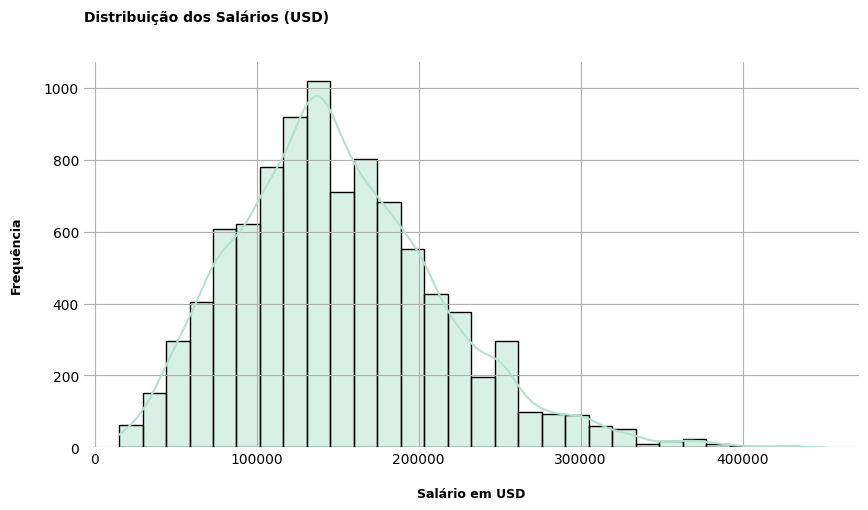

In [30]:
# Histograma do salário em USD
## Definindo as cotes do gráfico
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(10,5))
sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Distribuição dos Salários (USD)",fontsize=10,loc='left',pad=30, fontweight='bold')
plt.xlabel("Salário em USD", labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel("Frequência", labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**1. Distribuição dos Salários (Histograma + KDE)**

O que vemos: 

    A maioria dos salários se concentra em uma faixa mais baixa a média, enquanto poucos salários aparecem nas faixas muito altas.

Interpretação:

    A distribuição é assimétrica à direita (right-skewed) → muitos profissionais ganham valores medianos, mas há outliers com salários bem elevados.

    Esse comportamento é comum em remunerações onde poucos executivos ou especialistas recebem salários muito acima da média.

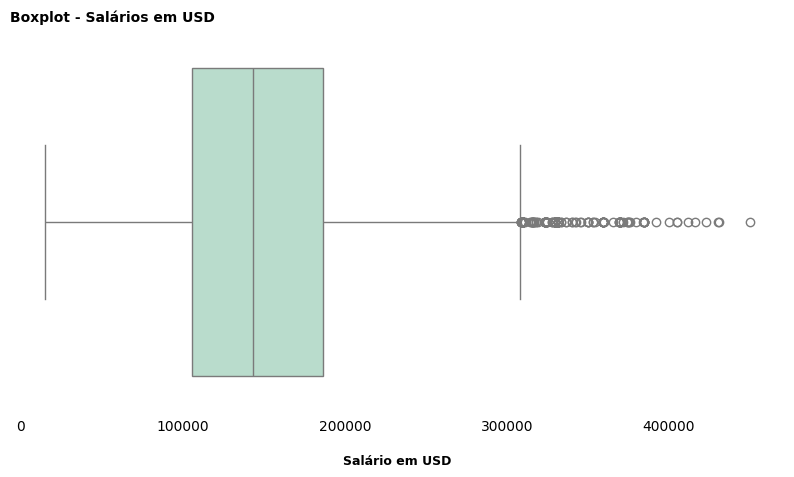

In [31]:
# Boxplot para detectar outliers de salário
plt.figure(figsize=(10,5))
sns.boxplot(x=df["salary_in_usd"])
plt.title("Boxplot - Salários em USD", loc='left', fontsize=10, fontweight='bold')
plt.xlabel("Salário em USD", labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**2. Boxplot dos Salários**

O que vemos: 

    A mediana está em uma faixa mais baixa, com grande concentração até o 3º quartil, e diversos outliers acima.

Interpretação:

    Os outliers não devem ser ignorados, pois podem representar posições de liderança (executives) ou oportunidades em mercados de alta remuneração.

    Confirma a dispersão salarial e a diferença significativa entre cargos de entrada e cargos avançados.

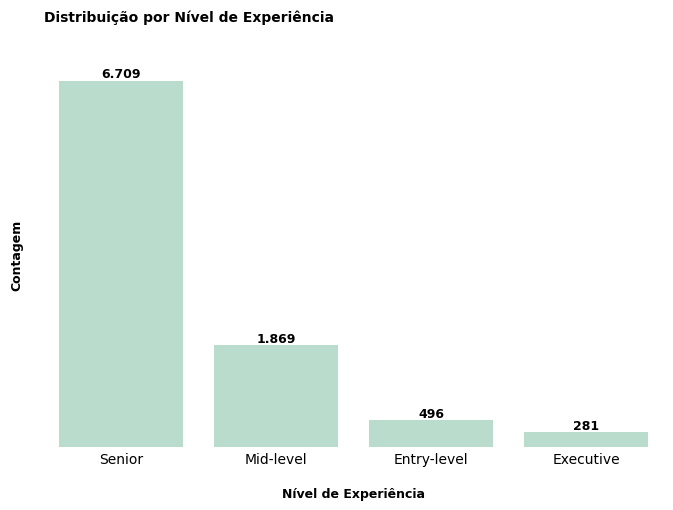

In [80]:
# Contagem por nível de experiência
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x="experience_level", order=df["experience_level"].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold',
    )
    
plt.title("Distribuição por Nível de Experiência", pad=30,loc='left',fontsize=10, fontweight='bold')
plt.xlabel("Nível de Experiência",labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel("Contagem", labelpad=15, fontsize=9, fontweight='semibold')
plt.tick_params(axis='both', length=0)
plt.box(False)
plt.yticks([])
plt.show()

**3. Distribuição por Nível de Experiência**

O que vemos: 

    A maior parte dos registros corresponde a profissionais de nível médio ou sênior, enquanto executivos e juniores aparecem em menor número.

Interpretação:

    Isso pode indicar que o mercado de Data Science já está maduro, com maior demanda por profissionais experientes.

    Também pode ser um viés do dataset: empresas podem contratar mais sêniores porque precisam de entregas de maior complexidade.

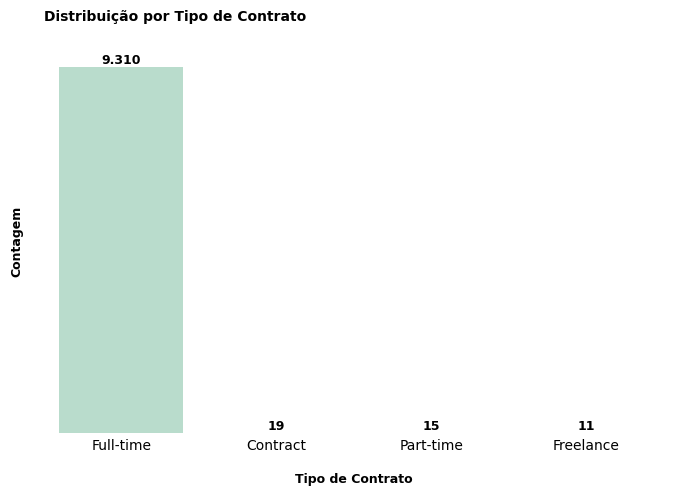

In [79]:
# Contagem por tipo de emprego
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x="employment_type", order=df["employment_type"].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')
        
plt.title("Distribuição por Tipo de Contrato",pad=20, loc='left', fontsize=10, fontweight='bold')
plt.xlabel("Tipo de Contrato", labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel("Contagem", labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.yticks([])
plt.show()

**4. Distribuição por Tipo de Contrato**

O que vemos: 

    Predominância de contratos full-time, seguidos de volumes pequenos de contratos part-time, temporários ou freelancers.

Interpretação:

    O setor de Data Science é visto como estratégico, e por isso as empresas preferem vínculos mais longos e estáveis.

    Contratos flexíveis podem aparecer em startups ou consultorias, mas representam a minoria.

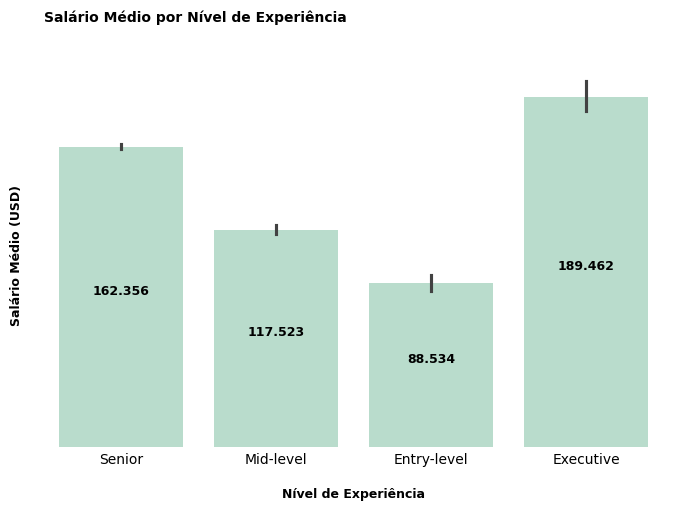

In [77]:
# Salário médio por nível de experiência
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x="experience_level", y="salary_in_usd", estimator="mean", order=df["experience_level"].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title("Salário Médio por Nível de Experiência", pad=30,fontsize=10,fontweight='bold', loc='left')
plt.xlabel("Nível de Experiência", labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel("Salário Médio (USD)", labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**5. Salário Médio por Nível de Experiência**

O que vemos:

    A remuneração cresce conforme a senioridade aumenta → junior < mid < senior < executive.

Interpretação:

    Mostra uma progressão clara de carreira: quanto maior a experiência, maior o salário.

    Essa progressão pode não ser linear: o salto entre senior e executive costuma ser muito maior do que entre junior e mid.

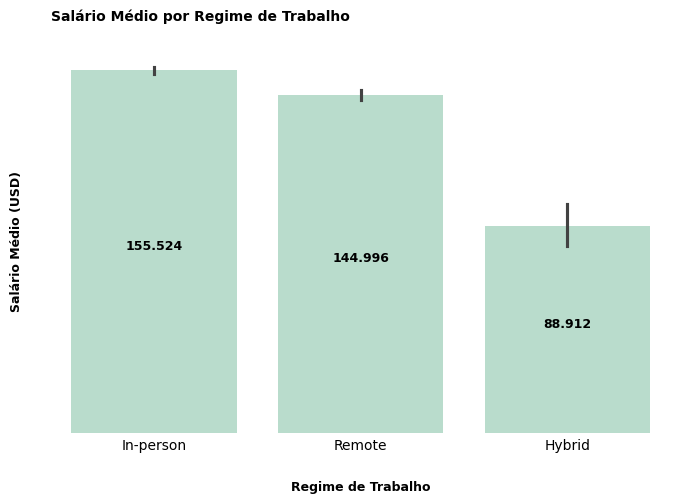

In [76]:
# Salário médio por regime de trabalho
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x="work_setting", y="salary_in_usd", estimator="mean",order=df["work_setting"].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title("Salário Médio por Regime de Trabalho", loc='left',fontsize=10, fontweight='bold', pad=20)
plt.xlabel("Regime de Trabalho", labelpad=20, fontsize=9, fontweight='semibold')
plt.ylabel("Salário Médio (USD)", labelpad=20, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**6. Salário Médio por Regime de Trabalho**

O que vemos: 

    Geralmente os salários de trabalho remoto aparecem mais altos do que híbrido e presencial.

Interpretação:

    Isso pode indicar que profissionais remotos conseguem acessar oportunidades em outros países ou empresas globais, com salários mais competitivos.

    Trabalhos presenciais tendem a estar atrelados ao mercado local, muitas vezes com salários menores.

**Conclusão geral da análise inicial:**

    O dataset mostra uma progressão natural de carreira, com salários maiores conforme aumenta a experiência.

    Existe desigualdade salarial significativa, com outliers muito altos puxando a média.

    O modelo de trabalho remoto tende a proporcionar salários mais elevados, refletindo a globalização do mercado de tecnologia.

    O setor ainda é dominado por contratos full-time e por profissionais de nível médio/sênior.

### **3.0 - Preparação dos Dados**

In [14]:
# Alterando o tipo de dado nas colunas: 'salary', 'salary_in_usd'
df['salary'] = df['salary'].astype('float64')
df['salary_in_usd'] = df['salary_in_usd'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   object 
 2   job_category        9355 non-null   object 
 3   salary_currency     9355 non-null   object 
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   object 
 7   experience_level    9355 non-null   object 
 8   employment_type     9355 non-null   object 
 9   work_setting        9355 non-null   object 
 10  company_location    9355 non-null   object 
 11  company_size        9355 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB
